[-16.39977097   2.90935146  -0.05839191] [[ 2.24801075e+01 -5.87208359e+00  3.21144942e-01]
 [-5.87208359e+00  1.84797178e+00 -1.09747694e-01]
 [ 3.21144942e-01 -1.09747694e-01  6.85561288e-03]]


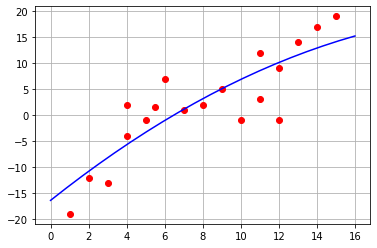

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit
def f(x, a0, a1, a2):
    return a0 + a1*x + a2*x**2
xdata = np.array([1,2,3,4,4,5,5.5,6,7,8,9,10,11,11,12,12,13,14,15])
ydata = np.array([-19,-12,-13,-4,2,-1,1.5,7,1,2,5,-1,12,3,9,-1,14,17,19]) 

plt.plot(xdata,ydata, 'o', color='r')
params, cov = curve_fit(f, xdata, ydata) 
print(params, cov)
x =np.linspace(0,16,20)
y = f(x,params[0],params[1],params[2]) 
plt.plot(x,y, color='b')
plt.grid()
plt.show()

In [32]:
X = rng.randn(n_samples, 2)
print(X)

[[-1.49125759  0.4393917 ]
 [ 0.1666735   0.63503144]
 [ 2.38314477  0.94447949]
 [-0.91282223  1.11701629]
 [-1.31590741 -0.4615846 ]
 [-0.06824161  1.71334272]
 [-0.74475482 -0.82643854]
 [-0.09845252 -0.66347829]
 [ 1.12663592 -1.07993151]
 [-1.14746865 -0.43782004]
 [-0.49803245  1.92953205]
 [ 0.94942081  0.08755124]
 [-1.22543552  0.84436298]
 [-1.00021535 -1.5447711 ]
 [ 1.18802979  0.31694261]
 [ 0.92085882  0.31872765]
 [ 0.85683061 -0.65102559]
 [-1.03424284  0.68159452]
 [-0.80340966 -0.68954978]
 [-0.4555325   0.01747916]]


In [36]:
from sklearn.linear_model import Ridge
import numpy as np
n_samples, n_features = 20, 1
rng = np.random.RandomState(0)
y = ydata
X = xdata.reshape(-1,1)
print(y)
print(X)
clf = Ridge(alpha=1.0)
clf.fit(X, y)

[-19.  -12.  -13.   -4.    2.   -1.    1.5   7.    1.    2.    5.   -1.
  12.    3.    9.   -1.   14.   17.   19. ]
[[ 1. ]
 [ 2. ]
 [ 3. ]
 [ 4. ]
 [ 4. ]
 [ 5. ]
 [ 5.5]
 [ 6. ]
 [ 7. ]
 [ 8. ]
 [ 9. ]
 [10. ]
 [11. ]
 [11. ]
 [12. ]
 [12. ]
 [13. ]
 [14. ]
 [15. ]]


Ridge()

In [38]:
clf.coef_

array([1.96857212])

PolynomialFeatures(degree=15, include_bias=False)
scores [-0.29784444 -0.05079751 -0.02709067 -0.01396096 -0.05046553 -0.06694235
 -0.08524496 -0.01152966 -0.03420811 -0.66828057]
coef_ [-12.75863596   9.48382828  25.50810334   2.51696883 -16.32982627
 -20.57341197 -14.50080315  -4.53296285   4.69081136  10.70900862
  12.66543181  10.66537237   5.29500118  -2.683026   -12.50130797]
scores [-0.29784444 -0.05079751 -0.02709067 -0.01396096 -0.05046553 -0.06694235
 -0.08524496 -0.01152966 -0.03420811 -0.66828057]
coef_ [-2.98291733e+03  1.03865669e+05 -1.87415481e+06  2.03718717e+07
 -1.44872948e+08  7.09313146e+08 -2.47065480e+09  6.24560720e+09
 -1.15676476e+10  1.56894948e+10 -1.54006127e+10  1.06457406e+10
 -4.91378477e+09  1.35919971e+09 -1.70381254e+08]


/Users/bob/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.88955e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/bob/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.77082e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/bob/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.12488e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


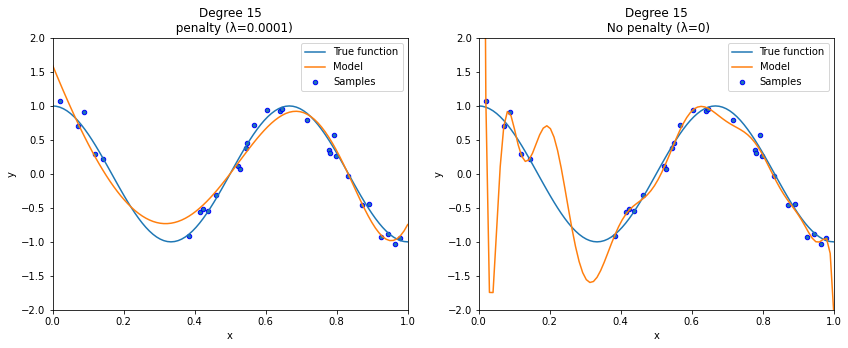

In [46]:
# https://qiita.com/K_Noguchi/items/3f5cf527d6f6d46767fb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn import linear_model

def true_fun(X):
    return np.cos( 3*np.pi * X)

np.random.seed(0)
n_samples = 30 #30個の点を用意
degrees = [15] #14次
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1  #真の関数にノイズを乗せる。

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)  #多項式の定義
    linear_regression = linear_model.Ridge(alpha=0.0001)               #リッジ回帰の定義

    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # 評価
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)
    reg=linear_regression
#    reg.coef_
    print("scores", scores)
    print("coef_", reg.coef_)

    linear_regression2 = linear_model.Ridge(alpha=0.0)
    pipeline2 = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression2)])
    pipeline2.fit(X[:, np.newaxis], y)

    # 評価
    scores2 = cross_val_score(pipeline2, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)


    reg=linear_regression2
#    reg.coef_
    print("scores", scores)
    print("coef_", reg.coef_)





    #plt.figure(figsize=(3, 3))
    plt.subplot(1,2,1)


    X_test = np.linspace(0, 1, 100)  #０から１の間に100個の等差数列を作る。
    #学習した関数
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\n  penalty (λ=0.0001)".format(
        degrees[i], -scores.mean(), scores.std()))


    plt.subplot(1,2,2)
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.plot(X_test, pipeline2.predict(X_test[:, np.newaxis]), label="Model")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\n No penalty (λ=0)".format(
        degrees[i], -scores.mean(), scores.std()))


plt.show()